### Load a map

In [7]:
from pymapmanager.mmMap import mmMap

# load a map
filePath = '/Users/cudmore/Desktop/data/cudmore/rr30a/rr30a.txt'
m = mmMap(filePath=filePath)

map rr30a loaded in 0.33 seconds.


### Generate new analysis by doing algebra on existing annotations

In [10]:
import numpy as np
from pymapmanager.mmUtil import newplotdict

# get values of annotaitons from our map m
pdOther = newplotdict()
pdOther['xstat'] = 'ubssSum_int2' # background-subtracted spine sum, channel 2
pdOther['ystat'] = 'ubsdSum_int2' # background subtracted dendrite sum, channel 2
#pdOther['zstat'] = 'isTransient'
pdOther = m.getMapValues3(pdOther)

# Do some algebra across annotations and generate your own new values
mRows = pdOther['x'].shape[0]
nCols = pdOther['x'].shape[1]
myNewStat = np.zeros([mRows,nCols])
myNewStat[:] = 'nan'

for (x,y), value in np.ndenumerate(pdOther['x']):
    # myNewStat is 'ubssSum_int2 / ubsdSum_int2'
    myNewStat[x,y] = pdOther['x'][x,y] / pdOther['y'][x,y]

mmMap.getMapValues3() took 0.18 seconds


### Plot our new analysis

<IPython.core.display.Javascript object>


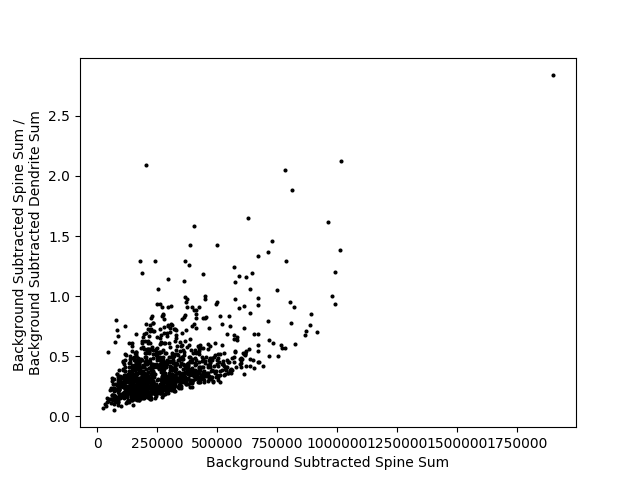

In [11]:
# plot with matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
x = pdOther['x']
y = myNewStat
plt.scatter(x, y, marker='.', c='k', s=15)
plt.xlabel('Background Subtracted Spine Sum')
plt.ylabel('Background Subtracted Spine Sum / \nBackground Subtracted Dendrite Sum')
plt.show()

## Homework

 - Do the same but limit analysis to one map segment. Hint, use pd['segmentID']=[1] for segment 1.
 - Do the same but get statistics (mean/sd/se) for each map segment